# Crash look at UK road traffic accident data

In [1]:
# Imports
# Data Processing
from time import time
import numpy as np
import pandas as pd

# Modelling
# from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn

# Visualisation Packages
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

import chart_studio.plotly as py
import plotly.graph_objects as go

## Read up the data

In [2]:
# Read up accidents
accidents_2019 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2019.zip",low_memory=False, compression='zip')
accidents_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv",low_memory=False)
accidents_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip",low_memory=False, compression='zip')
accidents_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",low_memory=False, compression='zip')
accidents_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip",low_memory=False, compression='zip')
accidents_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2014.zip",low_memory=False)

# Read up casualties
casualties_2019 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2019.zip",low_memory=False, compression='zip')
casualties_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv",low_memory=False)
casualties_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Casualties_2017.zip",low_memory=False, compression='zip')
casualties_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip",low_memory=False, compression='zip')
casualties_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Casualties_2015.zip",low_memory=False, compression='zip')
casualties_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2014.zip",low_memory=False, compression='zip')

# Read up vehicles
vehicles_2019 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2019.zip",low_memory=False, compression='zip')
vehicles_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv",low_memory=False)
vehicles_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2017.zip",low_memory=False, compression='zip')
vehicles_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip",low_memory=False, compression='zip')
vehicles_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip",low_memory=False, compression='zip')
vehicles_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2014.zip",low_memory=False, compression='zip')

In [3]:
# Create a single dataframe
df_accidents = accidents_2019.append([accidents_2018, accidents_2017, accidents_2016, accidents_2015], sort=False)
df_vehicles = vehicles_2019.append([vehicles_2018, vehicles_2017, vehicles_2016, vehicles_2015], sort=False)
df_casualties = casualties_2019.append([casualties_2018, casualties_2017, casualties_2016, casualties_2015], sort=False)

In [4]:
print(len(df_accidents))
df_accidents.head(3)

646830


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943


In [5]:
print(len(df_vehicles))
df_vehicles.head(3)

1192061


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3


In [6]:
print(len(df_casualties))
df_casualties.head(3)

852321


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5


## Clean the data
 - Keep columns needed
 - Convert date to DateTime
 - check the number of missing or "out of range values"
 - Convert the default encoding to Pandas Categorical type

In [7]:
def ToCategorical(df, col_name_list, category_dict_list):
    '''
    Converts the given columns to categorical data type with the correct categories
    used from the category_dict_list
    
    Parameters:
    df (Pandas DataFrame): Input dataframe with columns to convert to categorical type
    col_name_list  (list): List of column names from df. These columns will be converted
    category_dict_list (list): a list of dictionaries. each dictioanry corresponds to the respective column
       and holds the correct category names to use.

    Returns:
    DataFrame with categorical columns 
    '''
    
    df_out = df.copy()
    
    for i,col in enumerate(col_name_list):
        df_out[col] = df_out[col].astype('category')
        df_out[col].cat.categories = [category_dict_list[i][j] for j in df_out[col].cat.categories]
        
    return df_out

In [8]:
# Keep columns used, remove other columns
accident_cols_to_keep= ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                        'Longitude', 'Latitude','Date',
                        'Number_of_Vehicles', 'Number_of_Casualties',
                        '1st_Road_Class','Speed_limit',
                        'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions']

vehicle_cols_to_keep = ['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type', 'Age_of_Driver', 'Sex_of_Driver']

casuality_cols_to_keep = ['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
                          'Casualty_Severity']


df_accidents = df_accidents[accident_cols_to_keep].copy()
df_vehicles = df_vehicles[vehicle_cols_to_keep].copy()
df_casualties = df_casualties[casuality_cols_to_keep].copy()

In [9]:
# convert Date to DateTime object (Time is missing from ~100 accidents)
print('Number of null values in Date column: ' + str(len(df_accidents[df_accidents[["Date"]].isnull().any(axis=1)])))
df_accidents["Date"] = pd.DatetimeIndex(df_accidents["Date"], dayfirst=True)
df_accidents["Year"] = df_accidents["Date"].dt.year.astype('Int16')

Number of null values in Date column: 0


In [10]:
# Map categories
gender_dict = {1:'Male',2:'Female', 3:'Not known', -1:'Data missing or out of range'}
light_dict = {1:'Daylight',4:'Darkness - lights lit',5:'Darkness - lights unlit',6:'Darkness - no lighting',7:'Darkness - lighting unknown',-1:'Data missing or out of range'}
weather_dict ={1:'Fine no high winds',2:'Raining no high winds',3:'Snowing no high winds',4:'Fine + high winds',5:'Raining + high winds',6:'Snowing + high winds',7:'Fog or mist',8:'Other',9:'Unknown',-1:'Data missing or out of range'}
surface_dict = {1:'Dry',2:'Wet or damp',3:'Snow',4:'Frost or ice',5:'Flood over 3cm. deep',6:'Oil or diesel',7:'Mud',-1:'Data missing or out of range'}
severity_dict = {1:'Fatal',2:'Serious',3:'Slight'}
# speed_limit = {20:'20 MPH', 30:'30 MPH', 40:'40 MPH', 50:'50 MPH', 60:'60 MPH', 70:'70 MPH', -1:'Data missing or out of range', 0.0:'Data missing or out of range', np.nan:'Data missing or out of range'}
vehicle_type_dict = {1:'Pedal cycle', 2:'Motorcycle 50cc and under', 3:'Motorcycle 125cc and under', 4:'Motorcycle over 125cc and up to 500cc', 5:'Motorcycle over 500cc', 8:'Taxi/Private hire car', 9:'Car', 10:'Minibus (8 - 16 passenger seats)',
                     11:'Bus or coach (17 or more pass seats)', 16:'Ridden horse', 17:'Agricultural vehicle', 18:'Tram', 19:'Van / Goods 3.5 tonnes mgw or under', 20:'Goods over 3.5t. and under 7.5t', 21:'Goods 7.5 tonnes mgw and over', 22:'Mobility scooter',
                     23:'Electric motorcycle', 90:'Other vehicle', 97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight', -1:'Data missing or out of range',}

road_class_dict = {1:'Motorway', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'}


df_accidents = ToCategorical(df_accidents,
                             ['1st_Road_Class','Light_Conditions','Weather_Conditions','Road_Surface_Conditions'],
                             [road_class_dict,light_dict,weather_dict,surface_dict])

df_vehicles = ToCategorical(df_vehicles, ['Vehicle_Type', 'Sex_of_Driver'], [vehicle_type_dict, gender_dict])
df_casualties = ToCategorical(df_casualties, ['Casualty_Severity'], [severity_dict])

In [11]:
# Check the number of missing values

def CheckNulls(df, df_name='DataFrame'):
    '''
    Function that checks the number of rows with any missing values
    Input:
    df: DataFrame to check
    df_name: str, name to use as DF name in the returned prints
    
    Returns: Null, printing the numbor missig rows to the screen
    '''
    print('\n'+df_name)
    # Total number of Accident Table
    print(f'Number of rows in {df_name}: \t{len(df)}')

    # Numeric columns
    print(f'Number of numerical rows with any missing values in {df_name}: {df.isnull().any(axis=1).sum()}')
    cols_w_null = df.columns[df.isnull().any()].to_list()
    print(f'Numeric columns with nulls: {cols_w_null}')
    
    # Categoorical columns
    missing_cat_rows = df.isin(['Data missing or out of range','Unknown']).any(axis=1).sum()
    print(f'Number of categorical rows with any missing values in {df_name}: {missing_cat_rows}')


In [12]:
# Accidents
CheckNulls(df_accidents, 'df_accidents')
CheckNulls(df_vehicles, 'df_vehicles')
CheckNulls(df_casualties, 'df_casualties')


df_accidents
Number of rows in df_accidents: 	646830
Number of numerical rows with any missing values in df_accidents: 183
Numeric columns with nulls: ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Speed_limit']
Number of categorical rows with any missing values in df_accidents: 19457

df_vehicles
Number of rows in df_vehicles: 	1192061
Number of numerical rows with any missing values in df_vehicles: 0
Numeric columns with nulls: []
Number of categorical rows with any missing values in df_vehicles: 1339

df_casualties
Number of rows in df_casualties: 	852321
Number of numerical rows with any missing values in df_casualties: 0
Numeric columns with nulls: []
Number of categorical rows with any missing values in df_casualties: 0


<div class="alert alert-block alert-info">

<b>Note:</b> Although the number of rows with missing values seems small compared to the total sample size, they will be dealt with on a case-by-case basis, removing the missing values based on the columns used for the specific 
    analysis only.<br>
    E.g. We can still use rows for finding hot spots if driver age is not recorded (but coordinates are available). </div>

## 1. Is transport becoming safer?

In [13]:
# Merge Date to casualities
df_casualties_date = df_casualties.merge(df_accidents[["Accident_Index","Year"]], left_on="Accident_Index",right_on="Accident_Index",how='left')

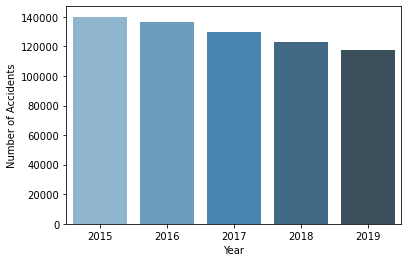

In [14]:
# Count accidents by year
df_accidents_by_year = df_accidents["Year"].value_counts()

# Plot
ax = sns.barplot(y=df_accidents_by_year.values, x=df_accidents_by_year.index, palette="Blues_d")
ax.set(xlabel="Year", ylabel = "Number of Accidents");

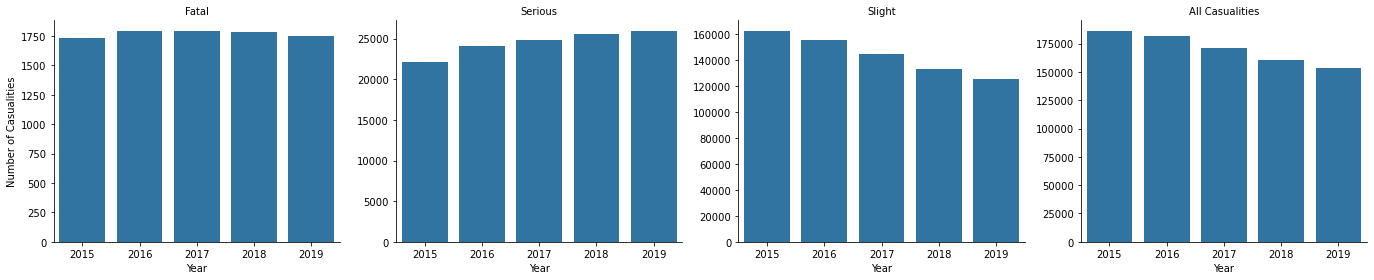

In [15]:
# How does the number of casualities change
df_casualties_by_year = df_casualties_date.groupby(by=['Casualty_Severity','Year'], as_index=False)['Accident_Index'].count()
df_total_casualities = df_casualties_by_year.groupby(by='Year', as_index=False)['Accident_Index'].sum()
df_total_casualities['Casualty_Severity'] = 'All Casualities'

df_casualties_by_year = df_casualties_by_year.append(df_total_casualities)

g = sns.FacetGrid(df_casualties_by_year, col="Casualty_Severity", sharey=False, height=4,
    aspect=1.2,)
g.map(sns.barplot, "Year", "Accident_Index", order=[2015,2016,2017,2018,2019])
g.set_axis_labels(y_var='Number of Casualities')
g.set_titles(col_template = '{col_name}');

In [16]:
# Percentage change compared to 2015 baseline
df_casualties_change_by_year = df_casualties_by_year.copy()

baseline = df_casualties_by_year.loc[df_casualties_by_year['Year']==2015,:]

for segment in df_casualties_by_year['Casualty_Severity'].unique():
    this_segment = df_casualties_change_by_year['Casualty_Severity']==segment
    this_baseline= baseline.loc[baseline['Casualty_Severity']==segment, 'Accident_Index'].values
    
    df_casualties_change_by_year.loc[this_segment, 'Accident_Index'] = df_casualties_change_by_year.loc[this_segment, 'Accident_Index']/this_baseline * 100

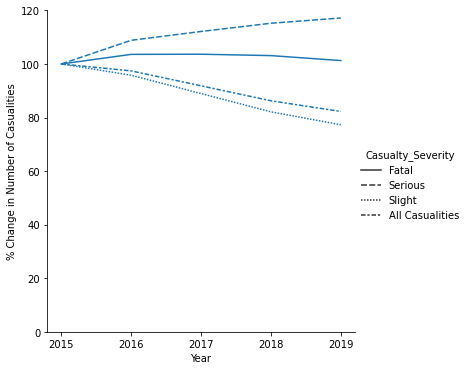

In [17]:
fig = sns.relplot(x="Year", y="Accident_Index", style="Casualty_Severity",
            palette="Blues_d",
            kind="line",
            data=df_casualties_change_by_year);

fig.set(ylim=(0, 120), xticks=[2015,2016,2017,2018,2019], ylabel='% Change in Number of Casualities');

## 2. How do the number of vehicles per accident and casualities per vehicle change?

In [ ]:
# vehicles per accident

In [ ]:
df_accidents.groupby(by='Year')['Number_of_Vehicles'].mean()

In [ ]:
df_accidents.groupby(by='Year')['Number_of_Casualties'].mean()

## 2. What is the agedistribution of the drivevrs involved in the accidents?

In [18]:
# Drop records with missing age of driver
df_vehicles_age = df_vehicles[df_vehicles['Age_of_Driver']>0]

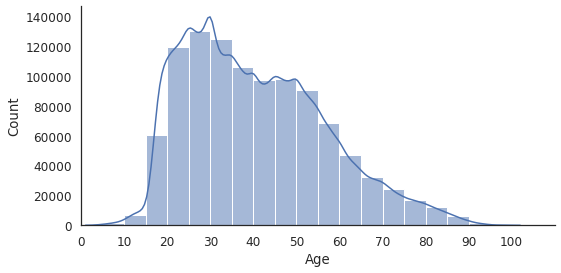

In [19]:
sns.set(font_scale=1.1)
sns.set_style("white")
fig = sns.displot(df_vehicles_age, x='Age_of_Driver', kind='hist', bins=list(range(0,110,5)), kde=True,
              height=4, aspect=2)
fig.set(xlim=(0, 110), xlabel=('Age'), xticks=list(range(0,110,10)))


## 3a are any vehicles types more dangerous?

In [20]:
# Needs vehicle type
df_vehicles

df_casualties_vehicles = df_casualties.merge(df_vehicles[['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type']], on=['Accident_Index', 'Vehicle_Reference'], how='left')
df_casualties_vehicles_roadtype = df_casualties_vehicles.merge(df_accidents[['Accident_Index', '1st_Road_Class']], on=['Accident_Index'], how='left')

In [21]:
# drop missing values
print(len(df_casualties_vehicles_roadtype))
df_casualties_vehicles_roadtype = df_casualties_vehicles_roadtype[~(df_casualties_vehicles_roadtype[['Vehicle_Type','1st_Road_Class']].isin(['Data missing or out of range','Unkown']).any(axis=1))].copy()
print(len(df_casualties_vehicles_roadtype))

852321
851956


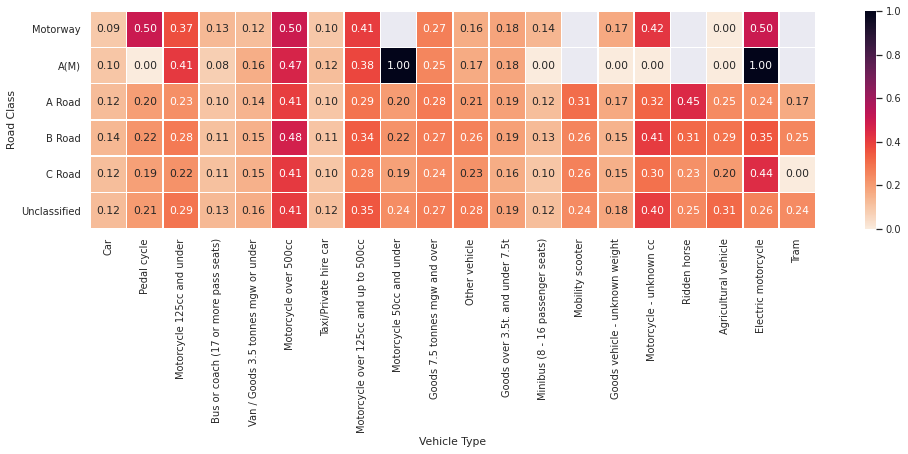

In [34]:
# Calculate Killed and severly injured casulty proportions
df_ksi_counts = df_casualties_vehicles_roadtype.value_counts(subset=['Vehicle_Type', '1st_Road_Class','Casualty_Severity']).unstack()
df_ksi_props = df_ksi_counts[['Fatal', 'Serious']].sum(1) / df_ksi_counts.sum(axis=1)
df_ksi_by_vehicle_roadtype=df_ksi_props.to_frame().unstack()
df_ksi_by_vehicle_roadtype.columns=['Motorway','A(M)','A Road','B Road','C Road','Unclassified']

df_ksi_by_vehicle_roadtype = df_ksi_by_vehicle_roadtype.transpose()

sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(18, 4))
sns.heatmap(df_ksi_by_vehicle_roadtype, annot=True, cmap="rocket_r",fmt='.2f',
            vmin=None,
            vmax=None,
            square=True, linewidths=.5, ax=ax,)

ax.set(ylabel='Road Class', xlabel="Vehicle Type");

## 4. Are injuries more severe in certain weather conditions?

In [148]:
# Merge Accident condition columns to Casuality severities
condition_cols = ['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']
df_casualties_conditions = df_casualties.merge(df_accidents[['Accident_Index'] + condition_cols], on='Accident_Index', how='left')

In [155]:
# drop missing values
print(len(df_casualties_conditions))
df_casualties_conditions = df_casualties_conditions[~(df_casualties_conditions[condition_cols].isin(['Data missing or out of range','Unknown','Other']).any(axis=1))].copy()
for col in condition_cols:
    df_casualties_conditions[col] = df_casualties_conditions[col].cat.remove_unused_categories()
print(len(df_casualties_conditions))

829355
813436


In [156]:
# Calculate Killed and severly injured casulty proportions
df_ksi_counts = df_casualties_conditions.value_counts(subset=condition_cols+['Casualty_Severity']).unstack()
df_ksi_props = df_ksi_counts[['Fatal', 'Serious']].sum(1) / df_ksi_counts.sum(axis=1)

df_ksi_props = df_ksi_props.to_frame().reset_index()
df_ksi_props.rename(columns={0:'KSI'}, inplace=True)
df_ksi_props = df_ksi_props.sort_values(by='KSI', ascending=False).reset_index(drop=True)
df_ksi_props['label'] = df_ksi_props[condition_cols].astype('str').agg('; '.join, axis=1)

df_ksi_props.head()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,KSI,label
0,Daylight,Raining + high winds,Snow,0.500,Daylight; Raining + high winds; Snow
1,Darkness - lights lit,Snowing + high winds,Dry,0.500,Darkness - lights lit; Snowing + high winds; Dry
2,Darkness - no lighting,Fog or mist,Snow,0.400,Darkness - no lighting; Fog or mist; Snow
3,Daylight,Fine + high winds,Flood over 3cm. deep,0.400,Daylight; Fine + high winds; Flood over 3cm. deep
4,Darkness - lights lit,Fine + high winds,Snow,0.375,Darkness - lights lit; Fine + high winds; Snow


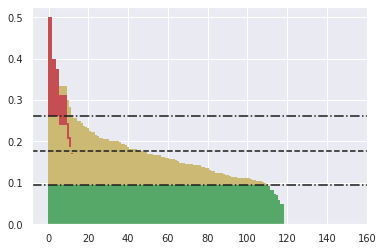

In [157]:
std = df_ksi_props.loc[df_ksi_props['KSI']>0, 'KSI'].describe()['std']
mean =df_ksi_props.loc[df_ksi_props['KSI']>0, 'KSI'].describe()['mean']

upper_threshold = mean+std
lower_threshold = mean-std

# split it up
x = df_ksi_props.index
above_threshold = np.maximum(df_ksi_props['KSI'] - upper_threshold, 0)
inbetween_threshold = np.minimum(np.maximum(df_ksi_props['KSI']-lower_threshold, 0), upper_threshold)
below_threshold = np.minimum(df_ksi_props['KSI'], lower_threshold)

# plot it
fig, ax = plt.subplots()
# ax.bar(height=df_ksi_props['KSI'], x=df_ksi_props.index, linewidth=0, width=1.0)

ax.bar(x, below_threshold, linewidth=0, width=1.0, color="g")
ax.bar(x, inbetween_threshold, linewidth=0, width=1.0, color="y", bottom=below_threshold)
ax.bar(x, above_threshold, linewidth=0, width=1.0, color="r", bottom=inbetween_threshold)


# Add a vertical line
ax.axhline(upper_threshold, ls='-.', color='k')
ax.axhline(mean, ls='--', color='k')
ax.axhline(lower_threshold, ls='-.', color='k')

# add the mean as a horisontal line and std as dotted.

In [158]:
df_ksi_props.loc[df_ksi_props['KSI']>=upper_threshold, 'KSI cat'] = 'High KSI'
df_ksi_props.loc[(df_ksi_props['KSI']<upper_threshold) & (df_ksi_props['KSI']>=lower_threshold), 'KSI cat'] = 'Medium KSI'
df_ksi_props.loc[df_ksi_props['KSI']<lower_threshold, 'KSI cat'] = 'Low KSI'

In [159]:
df_ksi_props['KSI cat'] = df_ksi_props['KSI cat'].astype('category')
df_ksi_props['KSI cat code'] = df_ksi_props['KSI cat'].cat.codes

In [160]:
fig = px.parallel_categories(df_ksi_props[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions','KSI','KSI cat','KSI cat code']],
                             dimensions=['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions','KSI cat'],
                             color="KSI cat code",
#                              color_continuous_scale=px.colors.sequential.Inferno,
                             labels={'Light_Conditions':'Light', 'Weather_Conditions':'Weather', 'Road_Surface_Conditions':'Surface'}
                            )

fig.show()

In [143]:
import plotly.graph_objects as go
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

df_ksi_props[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions','KSI','KSI cat','KSI cat code']]

# Create dimensions
light_dim = go.parcats.Dimension(
    values=df_ksi_props['Light_Conditions'],
    categoryorder='category ascending', label="Light")

weather_dim = go.parcats.Dimension(values=df_ksi_props['Weather_Conditions'], label="Weather")

surface_dim = go.parcats.Dimension(
    values=df_ksi_props['Road_Surface_Conditions'], label="Surface", categoryarray=[0, 1],
#     ticktext=['perished', 'survived']
    )

ksi_dim = go.parcats.Dimension(
    values=df_ksi_props['KSI cat code'], label="KSI", categoryarray=[0, 1, 2],
#     ticktext=['perished', 'survived']
    )

# Create parcats trace
color = df_ksi_props['KSI cat code'];
colorscale = [[0, 'red'], [1, 'lightsteelblue']]; #, [2, 'mediumseagreen']

fig = go.Figure(data = [go.Parcats(dimensions=[light_dim, weather_dim, surface_dim, ksi_dim],
#         line={'color': color, 'colorscale': colorscale},
#         hoveron='color', hoverinfo='count+probability',
#         labelfont={'size': 18, 'family': 'Times'},
#         tickfont={'size': 16, 'family': 'Times'},
         arrangement='freeform')
                       ]
               )

fig.show()

In [128]:
df_ksi_props_encoded = df_ksi_props.copy()

for col in condition_cols:
    df_ksi_props_encoded[col] = df_ksi_props[col].cat.codes
    
df_ksi_props_encoded.head()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,KSI,label,KSI cat
0,1,5,0,0.500,Darkness - lights lit; Snowing + high winds; Dry,High KSI
1,0,4,2,0.500,Daylight; Raining + high winds; Snow,High KSI
2,0,3,4,0.400,Daylight; Fine + high winds; Flood over 3cm. deep,High KSI
3,3,6,2,0.400,Darkness - no lighting; Fog or mist; Snow,High KSI
4,1,4,2,0.375,Darkness - lights lit; Raining + high winds; Snow,High KSI


In [129]:
fig = px.parallel_coordinates(df_ksi_props_encoded,
                              color="KSI",
                              dimensions=
                              ['Light_Conditions','Weather_Conditions',
                               'Road_Surface_Conditions','KSI'
                              ],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.25)
fig.show()

In [ ]:
light_dict

In [ ]:
df_ksi_props_encoded = ['KSI'].hist()

In [ ]:
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5','0.5+']
df_ksi_props['KSI_binned'] = pd.cut(df_ksi_props['KSI'], bins, include_lowest=True, labels=labels)

df_ksi_props.head()

In [ ]:
fig = px.parallel_categories(df_ksi_props, dimensions=condition_cols + ['KSI_binned'],
                             color="KSI",
                             color_continuous_scale=px.colors.sequential.Inferno,
                             #labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'}
                            )
fig.show()

In [ ]:
import plotly.graph_objects as go

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = "Block Height", values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            dict(range = [9,19984],
                 label = 'Assembly Penalty Wt', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW'])])
    )
)
fig.show()

In [ ]:
df

## https://datavizcatalogue.com/methods/parallel_coordinates.html

# https://towardsdatascience.com/parallel-coordinates-plots-6fcfa066dcb3

https://dataforvisualization.com/charts/parallel-sets-plot/#:~:text=Definition,higher%20value%20of%20that%20category.

Slhoutte metriccs?

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.&text=a%3D%20average%20intra%2Dcluster%20distance,each%20point%20within%20a%20cluster.

In [ ]:
df_ksi_props[df_ksi_props['KSI']>0.3]

In [ ]:
sns.set(font_scale=0.9)
df_light_weather = df_ksi_props[df_ksi_props['Road_Surface_Conditions'].isnull()].pivot(values='KSI',
                   index='Light_Conditions',
                   columns='Weather_Conditions')

sns.heatmap(df_light_weather, annot=True, cmap="YlGnBu", vmin=0, vmax=1);

In [ ]:
df_light_surface = df_ksi_props[df_ksi_props['Weather_Conditions'].isnull()].pivot(values='KSI',
                   index='Light_Conditions',
                   columns='Road_Surface_Conditions')

sns.heatmap(df_light_surface, annot=True, cmap="YlGnBu", vmin=0, vmax=1);

In [ ]:
df_weather_surface = df_ksi_props[df_ksi_props['Light_Conditions'].isnull()].pivot(values='KSI',
                   index='Weather_Conditions',
                   columns='Road_Surface_Conditions')

sns.heatmap(df_weather_surface, annot=True, cmap="YlGnBu", vmin=0, vmax=1);

## 5. can we find the worst accident hot spot locations?

In [ ]:
# Merge Coordinates to casualities
casuality_cols = ['Accident_Index','Vehicle_Reference','Casualty_Reference','Casualty_Severity']
coordinate_cols = ['Accident_Index','Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']
df_casualties_coords = df_casualties[casuality_cols].merge(df_accidents[coordinate_cols], on='Accident_Index', how='left')

# Drop Slight Injuries
print(len(df_casualties_coords))
df_casualties_coords = df_casualties_coords[~(df_casualties_coords['Casualty_Severity']=='Slight')].copy()

# Drop missing coordinates
print(len(df_casualties_coords))
df_casualties_coords = df_casualties_coords[~df_casualties_coords[['Location_Easting_OSGR','Location_Northing_OSGR']].isnull().any(axis=1)]

# Convert DataFrame to array
print(len(df_casualties_coords))
casuality_array = df_casualties_coords.values

# get the coordinates only
X = np.array(casuality_array[:,4:6], dtype='int32')

# Plot points for a visual checks
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.axis('equal');

### Set up DBSCAN
Run multiple set of model fitting<br>
for accidents with 500k points it took approx ~ 12 minutes<br>
using only KSI (Killed and Seriously Injured Casuality), we have 131,355 points and it takes ~2min<br>

In [ ]:
# get relative density accidents/sqm
start_time=time()

df_cluster_stats = pd.DataFrame(columns=['eps', 'min_samples', 'No of Clusters', 'Max No of accidents', 'Max No Cluster No', 'Max Width', 'Max Width Cluster No','silhouette_score','Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'])
cnt=0

for eps in range(5,71,5):
    for min_sample in range(5,101,1):
                
        # Run DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=12).fit(X)
        labels = db.labels_
        no_clusters = len(np.unique(labels))
        
        # Check if we have no Clusters
        if no_clusters==1:
            next
            
        else:
            # merge cluster labels back
            
            this_label_col_name = 'Cluster No:'+str(eps) + '-' + str(min_sample)
            
            df_casualties_coords[this_label_col_name] = labels
            df_accidents_coords_cluster = df_casualties_coords[df_casualties_coords[this_label_col_name]>(-1)].copy()
            
            # Silhouette Score
            # Silhouette
            if no_clusters<=2:
                silhouette_value = np.nan
            else:
                silhouette_value = silhouette_score(df_accidents_coords_cluster[['Location_Easting_OSGR', 'Location_Northing_OSGR']], df_accidents_coords_cluster[this_label_col_name])
            
            # Maximum number of accidents
            max_acc = df_accidents_coords_cluster[this_label_col_name].value_counts()
            max_acc_no = max_acc.max()
            max_acc_cluster_no = max_acc.idxmax()    
         
            # Get the centroids of clusters
            df_cluster_centroid = df_accidents_coords_cluster.groupby(by=[this_label_col_name])[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']].mean()
            coord_list = df_cluster_centroid.loc[max_acc_cluster_no, ['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude']].tolist()
            
            # get distance between furthest points 
            xy_max = df_accidents_coords_cluster.groupby(by=[this_label_col_name])[['Location_Easting_OSGR','Location_Northing_OSGR']].max()
            xy_min = df_accidents_coords_cluster.groupby(by=[this_label_col_name])[['Location_Easting_OSGR','Location_Northing_OSGR']].min()
            xy_delta = ((xy_max - xy_min))**2

            # Get the distance, increased by eps/2 to deal with nodes placed on top of each other
            df_cluster_centroid['Width'] = np.sqrt(xy_delta.sum(axis=1))+eps/2

            # Max distance and the cluster id 
            max_distance = df_cluster_centroid['Width'].max()
            max_distance_no = df_cluster_centroid['Width'].idxmax()          
        
        # Populate output
        df_cluster_stats.loc[cnt, :] = [eps, min_sample, no_clusters, max_acc_no, max_acc_cluster_no,max_distance,max_distance_no,silhouette_value] + coord_list

        cnt+=1
        
elapsed_time = time() - start_time
print('Clustering took: {:.2f} minutes'.format(elapsed_time/60))

In [ ]:
df_cluster_stats_w_clusters = df_cluster_stats[df_cluster_stats['No of Clusters']>1]

In [ ]:
df_cluster_stats_w_clusters.head()

In [ ]:
fig = px.line(df_cluster_stats_w_clusters,
              x="Max Width", y="No of Clusters",
              color="min_samples",
              line_group="min_samples",
              hover_name="min_samples",
             hover_data=['eps', 'min_samples', 'silhouette_score'])

eps_consition = df_cluster_stats_w_clusters['eps']==20
min_sample_cond = df_cluster_stats_w_clusters['min_samples']==7

fig2 = px.scatter(df_cluster_stats_w_clusters.loc[eps_consition & min_sample_cond],
                  x="Max Width", y="No of Clusters",
                 hover_data=['eps', 'min_samples',"Max Width","No of Clusters"])

fig.add_trace(fig2.data[0])
# fig.show()

fig.show()

In [ ]:
selected_eps = 20
selected_min_samples = 7

label_col = 'Cluster No:'+str(selected_eps) + '-' + str(selected_min_samples)

plotting_cols = ['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference','Casualty_Severity', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                 'Longitude', 'Latitude'] + [label_col]

df_casualties_coords_plot = df_casualties_coords[plotting_cols].copy()
df_casualties_coords_plot = df_casualties_coords_plot[df_casualties_coords_plot[label_col]>-1]

# Add jitter to overlapping coordinates:
xy_jitter = np.random.uniform(low=0.00001, high=0.0001, size=(len(df_casualties_coords_plot),2))

df_casualties_coords_plot[['Longitude','Latitude']] = df_casualties_coords_plot[['Longitude','Latitude']] + xy_jitter

print(len(df_casualties_coords_plot))
df_casualties_coords_plot.head() 

In [ ]:
# Accidents assigned to clusters
fig = px.scatter_mapbox(df_casualties_coords_plot,
                        lat="Latitude", lon="Longitude",
                        hover_name=label_col,
                        hover_data=["Casualty_Severity"],
                        color_discrete_sequence=["fuchsia"],
                        zoom=5,
                        height=500)

# Highest number of points

# Widest spread

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
py.plot(fig, filename = 'Killed and Severly Injured Casuality Clusters', auto_open=True)

### Most casualities

In [ ]:
eps_condition = df_cluster_stats_w_clusters['eps']==selected_eps
min_sample_condition = df_cluster_stats_w_clusters['min_samples']==selected_min_samples


label_max = df_cluster_stats_w_clusters.loc[eps_condition & min_sample_condition, 'Max No of accidents'].values[0]

In [ ]:
label_max

In [ ]:
df_casualties_coords_plot[df_casualties_coords_plot[label_col] == label_max]

## Look at the location with highest point counts

In [ ]:
db = DBSCAN(eps=50, min_samples=5, n_jobs=12).fit(X)
labels = db.labels_
df_casualties_coords['Cluster No'] = labels

In [ ]:
df_accidents_to_check = df_casualties_coords[df_casualties_coords['Cluster No']==403]

In [ ]:
df_accidents_to_check = df_accidents_to_check.merge(df_accidents[['Accident_Index','Latitude','Longitude']],
                                                    on='Accident_Index', how='left')

In [ ]:
df_accidents_to_check[['Location_Easting_OSGR', 'Location_Northing_OSGR']].mean()

In [ ]:
fig = px.scatter_mapbox(df_accidents_to_check, lat="Latitude", lon="Longitude",
                        hover_name="Cluster No",
                        hover_data=["Accident_Severity", "Number_of_Casualties",'Year'],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Look at the location with highest density

In [ ]:
df_cluster_list.sort_values(by='Density',ascending=False).head()

In [ ]:
db = DBSCAN(eps=5, min_samples=13, n_jobs=12).fit(X)
labels = db.labels_
df_casualties_coords['Cluster No'] = labels

In [ ]:
df_accidents_to_check = df_casualties_coords[df_casualties_coords['Cluster No']==3].copy()

df_accidents_to_check = df_accidents_to_check.merge(df_accidents[['Accident_Index','Latitude','Longitude']],
                                                    on='Accident_Index', how='left')

df_accidents_to_check[['Location_Easting_OSGR', 'Location_Northing_OSGR']].mean()

In [ ]:
np.random.randn(3)/1000

In [ ]:
jitter_x = np.random.rand(len(df_accidents_to_check))/1000
jitter_y = np.random.rand(len(df_accidents_to_check))/1000

df_accidents_to_check["Latitude_x"] = df_accidents_to_check["Latitude_x"]+jitter_x
df_accidents_to_check["Longitude_x"] = df_accidents_to_check["Longitude_x"]+jitter_y

In [ ]:
fig = px.scatter_mapbox(df_accidents_to_check, lat="Latitude_x", lon="Longitude_x",
                        hover_name="Cluster No",
                        hover_data=["Accident_Severity", "Number_of_Casualties",'Year'],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

df_accident_clusters.head()

## Try KDE

In [ ]:
# KDTRee
accident_tree = KDTree(accident_array[:,1:3])

rank_cols = []

for dist in range(50,215,15):
    df_accidents_coords_complete.loc[:,'Neighbour ' + str(dist)+ 'm'] = accident_tree.query_radius(accident_array[:,1:3],
                                                                                   r=dist,
                                                                                   count_only=True)
    
    df_accidents_coords_complete.loc[:,'Neighbour ' + str(dist) + 'm rank'] = df_accidents_coords_complete.loc[:,'Neighbour ' + str(dist)+ 'm'].rank(ascending=False)
    
    rank_cols.append('Neighbour ' + str(dist) + 'm rank')
#     df_accidents_coords_complete.sort_values(by='NeighbourNO', ascending=False).reset_index()[:20]

In [ ]:
df_accidents_coords_complete['Av Rank'] = df_accidents_coords_complete[rank_cols].mean(axis=1)

In [ ]:
df_accidents_coords_complete.sort_values(by=['Av Rank'], ascending=True).head()

## Try Optics

In [ ]:
start_time = time()
optics_clustering = OPTICS(min_samples=40, max_eps=25, metric='euclidean', n_jobs=8).fit(X)

end_time = time()
print((end_time-start_time))

In [ ]:
optics_labels = optics_clustering.labels_
print(len(np.unique(optics_labels)))

df_accidents_coords_complete['OPTICS Cluster No'] = optics_labels

df_accidents = df_accidents.merge(df_accidents_coords_complete[['Accident_Index', 'OPTICS Cluster No']],
                                  left_on='Accident_Index', right_on='Accident_Index', how='left')

In [ ]:
df_accidents.head()

In [ ]:
df_accident_clusters = df_accidents[df_accidents['OPTICS Cluster No_y']>-1].copy()
len(df_accident_clusters)

In [ ]:
fig = px.scatter_mapbox(df_accident_clusters, lat="Latitude", lon="Longitude",
                        hover_name='OPTICS Cluster No_y', hover_data=["Accident_Severity", "Number_of_Casualties"],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Can we estimate the number of casualities and respective severity?

A witness would know:
- Location
- type of Vehicles
- Date/time
- Surface conditions

Out of those what would be relevant?

What are we trying to estimate?
<br>
number of casualities with severity?
get a single estimation with a vector of 3 elements: number of slight, serious, fatal
 - Multivariate Linear Regression
 - ## Let's use ANN

- Veh Leaving Carriageway

<br>get a model for each vehicle?

In [ ]:
accident_features = ['Accident_Index','Road_Type','Speed_limit','Junction_Detail','Junction_Control',
                     'Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area']

vehicle_features = ['Vehicle_Type']
# Veh Leaving Carriageway

In [ ]:
df_vehicle_classes = df_vehicles.groupby(['Accident_Index','Vehicle_Type']).size().unstack(fill_value=0)
print(len(df_vehicle_classes))

In [ ]:
casaualty_severity = df_casualties.groupby(['Accident_Index','Casualty_Severity']).size().unstack(fill_value=0)
casaualty_severity.rename(columns={1: "Fatal", 2: "Serious", 3: "Slight"}, inplace=True)
casaualty_severity.head()

In [ ]:
print(len(df_accidents[accident_features]))
df_accidents_s1 = df_accidents[accident_features].merge(df_vehicle_classes, on="Accident_Index")
df_accidents_s2 = df_accidents_s1.merge(casaualty_severity, on="Accident_Index")

In [ ]:
# simply drop NA
df_accidents_s3 = df_accidents_s2.drop(df_accidents_s2[df_accidents_s2.isnull().any(1)].index)

# simply drop negatives:
value_cols = ['Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
 'Urban_or_Rural_Area', -1, 1, 2, 3, 4, 5, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 90, 97, 98, 'Fatal',
 'Serious', 'Slight']

df_accidents_s3.loc[df_accidents_s3['Junction_Control']==-1, 'Junction_Control'] = 5
df_accidents_s3.loc[df_accidents_s3['Junction_Detail']==-1, 'Junction_Detail'] = 10
df_accidents_s3.loc[df_accidents_s3['Road_Surface_Conditions']==-1, 'Road_Surface_Conditions'] = 8

df_accidents_s3.loc[df_accidents_s3['Light_Conditions']==-1, 'Light_Conditions'] = 8
df_accidents_s3.loc[df_accidents_s3['Weather_Conditions']==-1, 'Weather_Conditions'] = 9

df_accidents_s3.loc[df_accidents_s3['Road_Type']==-1, 'Road_Type'] = 9
df_accidents_s3.loc[df_accidents_s3['Urban_or_Rural_Area']==-1, 'Urban_or_Rural_Area'] = 3

In [ ]:
df_accidents_s3[(df_accidents_s3[value_cols] < 0).any(1)]

In [ ]:
x_cont_cols = ['Speed_limit', -1, 1, 2, 3, 4, 5, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 90, 97, 98]

x_cat_cols = ['Road_Type', 'Junction_Detail', 'Junction_Control', 'Light_Conditions',
              'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']

label_cols = ['Fatal', 'Serious', 'Slight']

In [ ]:
X = torch.tensor(df_accidents_s3[x_cont_cols + x_cat_cols].values, dtype=torch.float)
x_cont = torch.tensor(df_accidents_s3[x_cont_cols].values, dtype=torch.float)

df_accidents_s3[x_cat_cols] = df_accidents_s3[x_cat_cols].astype("category")
x_cat = torch.tensor( np.stack( [df_accidents_s3[col].cat.codes.values for col in x_cat_cols], axis=1), dtype=torch.int)

In [ ]:
x_cat.shape

In [ ]:
y = torch.tensor(df_accidents_s3[label_cols].values, dtype=torch.float)

## Train test split

<div class="alert alert-block alert-danger">
<b>Danger:</b> 

ADD SHUFFLING


</div>

In [ ]:
cat_train = x_cat[:batch_size-test_size]
cat_test = x_cat[batch_size-test_size:batch_size]
con_train = x_cont[:batch_size-test_size]
con_test = x_cont[batch_size-test_size:batch_size]

In [ ]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

### Setting up Model

In [ ]:
class RegressionModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.35):
        
        super().__init__()
        
        # Embedding
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        
        # Dropout layer
        self.emb_drop = nn.Dropout(p)
        
        # normalise the continous data
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])
        n_in = n_emb + n_cont
        
        # Create list of fully connected layers
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        # fully connected layer
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        
        self.layers = nn.Sequential(*layerlist)
        
        
    def forward(self, x_cat, x_cont):
        
        embeddings = []
                
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        # Concatenate individial vectors of categorical columns from embeddings    
        x = torch.cat(embeddings, 1)
        # Apply dropout
        x = self.emb_drop(x)
        
        # Normalise continous data
        x_cont = self.bn_cont(x_cont)
        
        # Concatenate categorical and continous columns
        x = torch.cat([x,x_cont],1)
        # Pass through tensor the fully connected layers
        x = self.layers(x)
        
        return x

In [ ]:
torch.manual_seed(42)
model = RegressionModel(emb_szs, len(x_cont_cols), 3, [200,100,60], p=0.4)

criterion = nn.MSELoss() # np.sqrt(MSE) --> RMS

optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
batch_size = 60000
test_size = int(batch_size * 0.2)

In [ ]:
start_time = time()

epochs = 300

losses = []

for i in range(epochs):
    i+=1
    
    y_pred = model(cat_train,con_train)
    y_pred = torch.round(y_pred)
    loss = torch.sqrt(criterion(y_pred, y_train))
    
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
        
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
end_time = time()
duration = end_time - start_time
print(f'Traning took {duration/60} minutes')

In [ ]:
torch.round(y_pred)

In [ ]:
plt.plot(range(epochs), losses)

In [ ]:
with torch.no_grad():
    
    y_val = model(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_val, y_test))

In [ ]:
loss

In [ ]:
for i in range(10):
    
    print(f'{i}.) Predicted: {y_val[i]} TRUE: {y_test[i]}')